# We are going to use the Iris flowers dataset to explore Machine Learning algorithms and methods to measure accuracy scores. To do this, we shall be using logistic regression and several values of K using a KNN algorithm, in order to predict the kind of flower we are providing the model data for.

![Image of flowers](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


## We start by opening a dataset containing a set of 150 different flowers, detailing their correspondent measurements in the first 3 columns, and a 4th column containing the clasification of the flower, being 0 = "Setosa", 1= "Versicolor" and 2 = "Virginica"

The dataset is akin to a conventional matrix containing measurements for different parts of the flower, like petal width, lenght and sepal measurement.

In [1]:
#reading the original data
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
#create X (features) and y (response)
X = iris.data
y = iris.target


# What kind of flower is it? Ignoring the values given to us in the 4th column , we'll use a Logistic Regression algorithm to do the prediction of each value in the 4th column ourselves and see how well we predicted the kind of flower it is, based in its measurements.

In [3]:
#import the class we need
from sklearn.linear_model import LogisticRegression

In [4]:
#instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X,y)

#predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
#store the predicted values
y_pred = logreg.predict(X)

#we check how many predictions were generated
len(y_pred)

150

In [6]:
#compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


# Now we'll use a different technique, a KNN algorithm, to do the prediction

In [26]:
#we import the appropriate classifier and fit the data to it
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


In [8]:
#now we'll change the value of k to 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [9]:
#k = 1 is incorrect because it's taking the k observation of the point itself
#that's why it's 100% correct. It's comparing to itself

# Basic evalutation procedure: Train/test split

![Image of AI](http://www.electronicbeats.net/app/uploads/2018/02/AI_Electronic_Beats-1240x710.png)


In [10]:
#for checking purposes, we print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
#step 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4)

In [12]:
#let's check the split by printing shapes
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [13]:
#print the shapes of new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [14]:
#step 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
#step 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

#compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [16]:
#now let's repeat this test but this time using knn instead, and k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [17]:
# and we repeat it for k = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


# We can conclude that k = 5 is the best model for this particular data set. But is there a way to automate the testing for k with many different values?

In [18]:
#we'll try k = 1 through k = 25 and record testing accuracy for each value of k
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing accuracy')

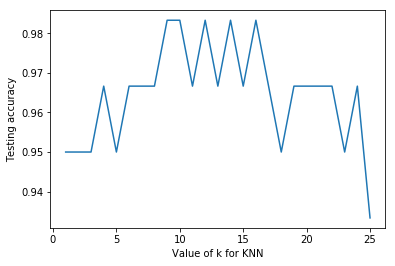

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')

In [20]:
#since we can see we can reach levels over .98, 
#now we print the accuracy for the top k scores, 
for i, k in enumerate(scores):
    if k > 0.98:
        print(i+1, k)

9 0.9833333333333333
10 0.9833333333333333
12 0.9833333333333333
14 0.9833333333333333
16 0.9833333333333333


# As an optimal k value, we'll choose the one in the middle of all the possible optimal ranges. In this case, we choose k = 19

# Now we proceed to test the model with the choosen k value, but using the whole of the data for training

In [21]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X, y)
some_random_value_to_predict = [[3,5,4,2]] #these are the measurements of a flower we just measured
knn.predict(some_random_value_to_predict)

array([1])

In [22]:
#The result of the prediction is that the value to predict is a "1"

In [23]:
#Now we check what values correspond to each flower in the dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
#...and we double check, just to be sure...
iris.target_names[1]

'versicolor'

In [25]:
#According to the result above, since the predicted value for a flower with the measurements [3,5,4,2] is "1"...
# this corresponds to the flower being a "Versicolor" type of flower